# Spring N°4 - Tarea 02: Ejercicios 02 y 03

Realizar visualizaciones gráfica de múltiples variables.

## Ejercicio N°2

Realizar las tareas de preprocesado y adecuación del Dataset que disponemos en el repositorio de GitHub  PRE-PROCESSING-FECHA con el objetivo de prepararlo y trabajarlo como dataframe para extraer información.
* Link: https://github.com/BIDDL3/PRE-PROCESSING-DATA/blob/main/movies.dat 
* El objetivo: Un dataframe con las variables de nombre de la película , año y género (quedarse con un solo género para cada película)

### Preparación de la data

In [1]:
import pandas as pd
import numpy as np

In [2]:
column_names = ['ID', 'Title', 'Genre']
data_movies = pd.read_table('movies.dat', header = None, sep = "::", names= column_names, engine = 'python', 
                            encoding = "ISO-8859-1")
data_movies

,ID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [3]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      3883 non-null   int64 
 1   Title   3883 non-null   object
 2   Genre   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


**Observaciones:** 
* Se puede observar que se tienen 3 columnas: 1 tipo numérica y dos objetos, sin embargo en la columna "title" contiene datos del titulo de la peliculas y el año de estreno, por lo que se procederá a crear dos columnas nuevas para alojar los datos titulos y años por separados. 
* Tambien se puede obervar que algunas películas presentan varios gereros, en vista que el enunciado indican quedarse con un solo genero, se procederá a eliminar los generos sobrantes. 
* Las variables objetos se procederan a cambiar a categoricas o numericas, de acuerdo al caso, para mejorar la memoria del dataset.
* Se verificará si hay valores nulos o NaN, asi como si existen valores duplicados.

* **Creación de las columnas Titulo y Año**

In [4]:
#Creación de la columna año y extrar el valor de la columna titulo
data_movies['Year'] = data_movies['Title'].str.extract(r"\(([0-9]+)\)", expand=False).copy()

data_movies['Title'] = data_movies.Title.str.replace('(\(\d\d\d\d\))', '').copy()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9556\4262438880.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data_movies['Title'] = data_movies.Title.str.replace('(\(\d\d\d\d\))', '').copy()


In [5]:
data_movies

,ID,Title,Genre,Year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


* **Selección del genero**

In [6]:
data_movies['Genre'] = data_movies.Genre.str.split('|')

data_movies.head(10)

,ID,Title,Genre,Year
0,1,Toy Story,"[Animation, Children's, Comedy]",1995
1,2,Jumanji,"[Adventure, Children's, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama]",1995
4,5,Father of the Bride Part II,[Comedy],1995
5,6,Heat,"[Action, Crime, Thriller]",1995
6,7,Sabrina,"[Comedy, Romance]",1995
7,8,Tom and Huck,"[Adventure, Children's]",1995
8,9,Sudden Death,[Action],1995
9,10,GoldenEye,"[Action, Adventure, Thriller]",1995


In [7]:
data_movies['Genre'] = data_movies.Genre.str[0].str.strip()

data_movies.head(10)

,ID,Title,Genre,Year
0,1,Toy Story,Animation,1995
1,2,Jumanji,Adventure,1995
2,3,Grumpier Old Men,Comedy,1995
3,4,Waiting to Exhale,Comedy,1995
4,5,Father of the Bride Part II,Comedy,1995
5,6,Heat,Action,1995
6,7,Sabrina,Comedy,1995
7,8,Tom and Huck,Adventure,1995
8,9,Sudden Death,Action,1995
9,10,GoldenEye,Action,1995


* **Convertir la variable "Year" de objeto a numérica**

In [9]:
data_movies['Year'] = pd.to_numeric(data_movies['Year'], errors='coerce')

* **Convertir las variables objetos a categoricas.**

In [10]:
tipos = {'Title':'category',
         'Genre':'category'}
data_movies.astype(tipos).dtypes

ID          int64
Title    category
Genre    category
Year        int64
dtype: object

* **Chequar valores duplicados**

In [11]:
data_movies.loc[data_movies.duplicated()]

,ID,Title,Genre,Year


* **Chequear valores NaN y nulos**

In [12]:
data_movies.isna().sum().sort_values(ascending = False)

ID       0
Title    0
Genre    0
Year     0
dtype: int64

In [13]:
data_movies.isnull().sum().sort_values(ascending = False)

ID       0
Title    0
Genre    0
Year     0
dtype: int64

Se puede observar que no ha valores duplicados, ni nulos ni NaN. Se procederá a realizar un analisis global del nuevo dataset.

In [ ]:
#Exportar el nuevo dataset
data_movies.to_excel('new_datamovies.xlsx', index = False)

### Visión global 

* **Información general**

In [14]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      3883 non-null   int64 
 1   Title   3883 non-null   object
 2   Genre   3883 non-null   object
 3   Year    3883 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 121.5+ KB


* **Número de valores unicos**

In [15]:
data_movies.nunique()

ID       3883
Title    3841
Genre      18
Year       81
dtype: int64

* **Visión global de estadísticos**

   1.  **Variables Categóricas**

In [16]:
data_movies.describe(include = 'O').T

,count,unique,top,freq
Title,3883,3841,Hamlet,5
Genre,3883,18,Drama,1176


In [17]:
Titles = data_movies.Title.value_counts()
Titles 

Hamlet                                         5
Mummy, The                                     3
Ballad of Narayama, The (Narayama Bushiko)     2
Dracula                                        2
101 Dalmatians                                 2
                                              ..
Breathing Room                                 1
Paris Was a Woman                              1
Anna                                           1
I'm Not Rappaport                              1
Contender, The                                 1
Name: Title, Length: 3841, dtype: int64

In [19]:
Genres = data_movies.Genre.value_counts()
Genres

Drama          1176
Comedy         1024
Action          503
Horror          262
Adventure       155
Crime           131
Documentary     123
Thriller        101
Animation        90
Children's       89
Romance          50
Sci-Fi           46
Mystery          36
Western          33
Film-Noir        25
Musical          25
War              12
Fantasy           2
Name: Genre, dtype: int64

2. **Variables Numéricas**

In [27]:
data_movies['Year'].describe().round(3).reset_index()

,index,Year
0,count,3883.000
1,mean,1986.067
2,std,16.896
3,min,1919.000
4,25%,1982.000
5,50%,1994.000
6,75%,1997.000
7,max,2000.000


In [24]:
#Calculo de la mediana de la varaible "Año"
mediana=(data_movies['Year']).median()
mediana_round=round(mediana,3)
mediana_round

1994.0

In [50]:
#Calculo de la media de la varaible "Año"
media=(data_movies['Year']).mean()
media_round=round(media,3)
media_round

1986.067

**Observaciones:**
* El dataset muestra 3883 titulos registraods, siendo el film mas frecuente Hanlet, asumiendo que tiene varias versiones con respecto al intevrlo del tiempo.
* Se encuentran 18 tipos de generos y el más frecuente es "Drama".
* La media se ecuentra en el año 1986 y la mediana (50% de los datos) es de 1994.

## Ejercicio N°3

* Muestra tu creatividad. ¿Qué crees relevante mostrar del Dataset " movies.dat " del ejercicio anterior?

* Realiza una o dos representaciones gráficas y justifica tu elección.

* **Análisis exploratorio y visualización**

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1. **Número de peliculas por años**

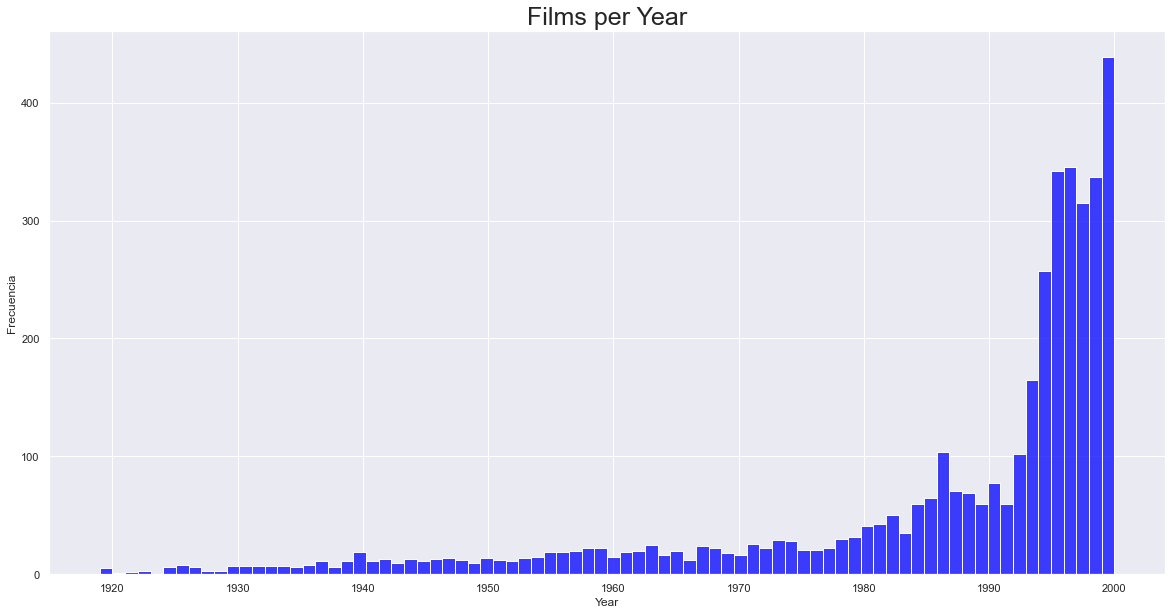

In [69]:
sns.set(style="darkgrid")
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)

ax = sns.histplot( x = data_movies['Year'], color = 'blue', bins=80)

plt.title("Films per Year", fontsize = 25)
ax.set_ylabel("Frecuencia")

plt.show()

Se puede observa la evolución del mundo del cine entre los años **1920-2000**, en donde hubo un aumento constante, sin embargo en donde se observa el mayor auge de peliculas producidas se encuetra mediado de los años **90**, con un crecimiento de mas de un **100%**.

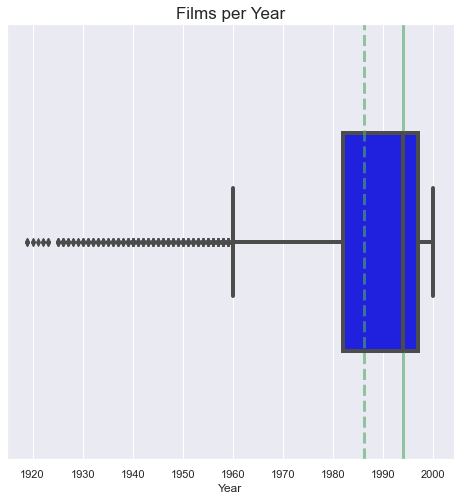

In [77]:
fig_dims = (8,8)
fig, ax = plt.subplots(figsize= fig_dims)

ax = sns.boxplot(x = data_movies['Year'], color = 'blue', fliersize= 5, linewidth= 4, width = 0.5)

#graficar la media y mediana en el gráfico
ax.axvline(x=media_round, linewidth=3, color='g', label="mean", alpha=0.6,ls='--')
ax.axvline(x=mediana_round, linewidth=3, color='g', label="median", alpha=0.6,ls='-')

plt.title('Films per Year', fontsize = 17)

plt.show()

El gráfico boxplot confirma lo anteriormente indicado, se puede observar que existe una asimetría sesgada a la izquierda, debido que el valor de la media es inferior al valor de la mediana.
La parte izquierda de la caja es mayor que la de la derecha, lo que indica que al auge de la evolución del cine estan comprendidos entre el 25% y el 50% de la muestra, es decir, entre los años 1980 mediados de los años 1990.
Adcionalmente se pueden observa los valores atípicos por encima del límite inferior.

2. **Distribucción de las películas por géneros**

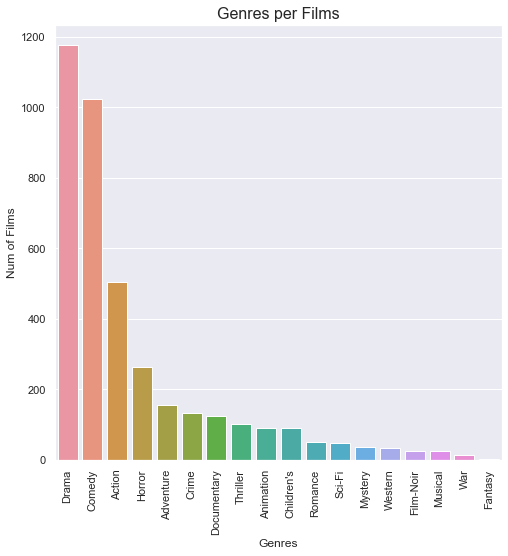

In [75]:
fig_dims = (8,8)
fig, ax = plt.subplots(figsize= fig_dims)

sns.set(style="darkgrid")

ax= sns.barplot(x=Genres.index, y=Genres)

plt.xticks(rotation=90)
plt.title("Genres per Films", fontsize = 16)
ax.set_xlabel("Genres")
ax.set_ylabel("Num of Films")


plt.show()

En este grafico se observa que los géneros con mayor films son Drama, Comedia y Acción.